<a href="https://colab.research.google.com/github/jakubkirsz/Obliczenia_naukowe/blob/main/projekt_Jakub_Kirsz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projekt nr 3: samochód osobowy

#Zad 1
Na podstawie pliku macierz_dostepnosci.xlsx stwórz tabelę odległości między każdą parą miast
wojewódzkich (odległość drogowa zaokrąglona do pełnych kilometrów). Brakujące dane uzupełnij na
podstawie Google Maps.

In [ ]:
import numpy as np
import networkx as nx
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plik = pd.read_excel('https://stat.gov.pl/download/gfx/portalinformacyjny/pl/defaultaktualnosci/6338/11/1/1/macierz_dostepnosci.xlsx', sheet_name='macierz_dostępności')

In [ ]:
pd.DataFrame(plik)

,Kod gminy wyjazdu\n(Kod gminy miejsca zamieszkania)a,Gmina wyjazdu\n(Gmina miejsca zamieszkania),Kod powiatu wyjazdu,Powiat wyjazdu,Kod województwa wyjazdu\n(Kod województwa miejsca zamieszkania),Województwo wyjazdu\n(Województwo miejsca zamieszkania),Kod gminy przyjazdu\n(Kod gminy miejsca pracy),Gmina przyjazdu\n(Gmina miejsca pracy),Kod powiatu przyjazdu,Powiat przyjazdu,Kod województwa przyjazdu\n(Kod województwa miejsca pracy),Województwo przyjazdu\n(Województwo miejsca pracy),Odległość geodezyjna\n(w km),Odległość drogowa\n(w km),Czas przejazdub\n(w min.),Czas przejazdu\n(min:sek)
0,0201011,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,201022.0,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,5.37,5.99,10.35,10:21
1,0201011,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,201032.0,Gromadka,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,20.40,26.05,35.67,35:40
2,0201011,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,201044.0,Nowogrodziec - miasto,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,13.95,17.41,23.92,23:55
3,0201011,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,201045.0,Nowogrodziec - obszar wiejski,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,14.71,16.59,23.30,23:18
4,0201011,Bolesławiec,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,201052.0,Osiecznica,201.0,Powiat bolesławiecki,2.0,Dolnośląskie,17.68,20.32,27.48,27:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34984,3263011,Świnoujście,3263.0,Powiat m.Świnoujście,32.0,Zachodniopomorskie,3207045.0,Międzyzdroje - obszar wiejski,3207.0,Powiat kamieński,32.0,Zachodniopomorskie,10.37,23.30,33.43,33:26
34985,3263011,Świnoujście,3263.0,Powiat m.Świnoujście,32.0,Zachodniopomorskie,3262011.0,Szczecin,3262.0,Powiat m.Szczecin,32.0,Zachodniopomorskie,50.18,108.33,100.02,100:01
34986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34987,a W nawiasach podano opis zmiennych zastosowan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dane = plik

In [ ]:
dane=dane.rename(columns={'Gmina wyjazdu\n(Gmina miejsca zamieszkania)':'Wyjazd','Gmina przyjazdu\n(Gmina miejsca pracy)':'Przyjazd','Odległość drogowa\n(w km)':'Odl_km'})
dane=dane[['Wyjazd','Przyjazd','Odl_km']]
dane['Odl_km']=dane['Odl_km'].round(0)

In [ ]:
dane

,Wyjazd,Przyjazd,Odl_km
0,Bolesławiec,Bolesławiec,6.0
1,Bolesławiec,Gromadka,26.0
2,Bolesławiec,Nowogrodziec - miasto,17.0
3,Bolesławiec,Nowogrodziec - obszar wiejski,17.0
4,Bolesławiec,Osiecznica,20.0
...,...,...,...
34984,Świnoujście,Międzyzdroje - obszar wiejski,23.0
34985,Świnoujście,Szczecin,108.0
34986,NaN,NaN,NaN
34987,NaN,NaN,NaN


In [ ]:
miasto = {'Białystok','Bydgoszcz','Gdańsk','Gorzów Wielkopolski','Katowice','Kielce','Kraków','Lublin','Łódź','Olsztyn','Opole','Poznań','Rzeszów','Szczecin','Toruń','Warszawa','Wrocław','Zielona Góra'}
dane=dane[dane.Wyjazd.isin(miasto) & dane.Przyjazd.isin(miasto)]
print(dane.isnull().sum())

Wyjazd      0
Przyjazd    0
Odl_km      0
dtype: int64


In [ ]:
dane

,Wyjazd,Przyjazd,Odl_km
2638,Wrocław,Toruń,398.0
2640,Wrocław,Lublin,528.0
2641,Wrocław,Gorzów Wielkopolski,259.0
2642,Wrocław,Zielona Góra,151.0
2645,Wrocław,Łódź,224.0
...,...,...,...
34936,Szczecin,Warszawa,571.0
34940,Szczecin,Gdańsk,347.0
34944,Szczecin,Katowice,578.0
34945,Szczecin,Olsztyn,485.0


In [ ]:
dane.groupby(dane[['Wyjazd','Przyjazd']].apply(frozenset, axis=1), as_index = False).first()

,Wyjazd,Przyjazd,Odl_km
0,Wrocław,Toruń,398.0
1,Opole,Poznań,281.0
2,Opole,Katowice,120.0
3,Opole,Gdańsk,544.0
4,Warszawa,Szczecin,569.0
...,...,...,...
109,Toruń,Poznań,163.0
110,Toruń,Katowice,363.0
111,Toruń,Gdańsk,175.0
112,Toruń,Warszawa,265.0


#Zadanie 2
Utwórz graf z wagami, którego wierzchołkami są nazwami miast wojewódzkich w Polsce, zaś krawędzie,
to drogi pomiędzy którymi możesz się poruszać swoim autem (odległość krótsze niż 200 km). Wagi mają
oznaczać odległości.


In [ ]:
dane = dane[dane.Odl_km < 200]

In [ ]:
dane

,Wyjazd,Przyjazd,Odl_km
2642,Wrocław,Zielona Góra,151.0
2666,Wrocław,Opole,109.0
2696,Wrocław,Poznań,178.0
4503,Bydgoszcz,Toruń,45.0
4514,Bydgoszcz,Gdańsk,173.0
4528,Bydgoszcz,Poznań,146.0
4603,Toruń,Bydgoszcz,45.0
4607,Toruń,Łódź,176.0
4614,Toruń,Gdańsk,175.0
4622,Toruń,Poznań,163.0


In [ ]:
Graf = nx.from_pandas_edgelist(dane, source='Wyjazd', target='Przyjazd', edge_attr = 'Odl_km')

In [ ]:
#nx.from_pandas_edgelist()

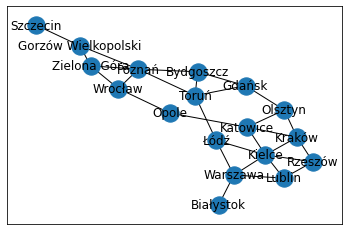

In [ ]:
nx.draw_networkx(Graf)

In [ ]:
km = list(dane['Odl_km'])
trasy = list(zip(list(dane['Przyjazd']),list(dane['Wyjazd']),list(dane['Odl_km'])))

dystans = {}

for i,j,k in trasy:
  if (i,j) not in dystans:
    dystans[(i,j)]=k

In [ ]:
nx.set_edge_attributes(Graf, dystans, name = 'Dystans')

#Zadanie 3 
Narysuj powyższy graf wraz z odległościami na krawędziach. Każde województwo ma mieć osobny
kolor wierzchołka.

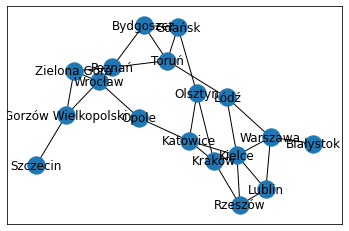

In [18]:
nx.draw_networkx(Graf)

In [19]:
Graf.number_of_nodes

<bound method Graph.number_of_nodes of <networkx.classes.graph.Graph object at 0x7fba9ad18550>>

In [21]:
df = pd.DataFrame(np.random.randn((Graf.number_of_nodes() ), 1), columns=list('A')).cumsum()
kolory=df.values.tolist()

[]

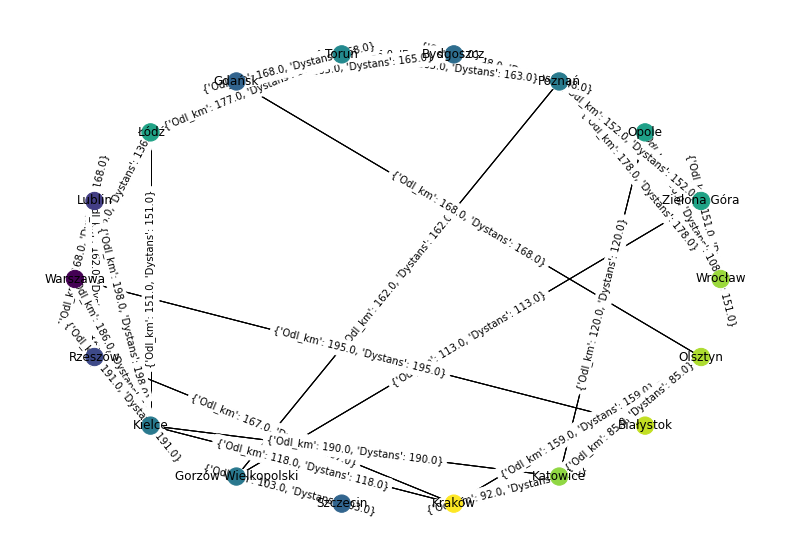

In [37]:
fig,osie=plt.subplots(1,1,figsize=(14,10))
pos_s = nx.circular_layout(Graf)
pozycje=pos_s
nx.draw(Graf,pos=pozycje,node_color=kolory)
nx.draw_networkx_labels(Graf, pos=pozycje)
nx.draw_networkx_edges(Graf,pos=pozycje)
nx.draw_networkx_edges(Graf,pos=pozycje) 
nx.draw_networkx_edge_labels(Graf,pos=pozycje)

# usuwanie osi
for side in ['bottom','right','top','left']:
   osie.spines[side].set_visible(False)

# usuwanie labelek osi
osie.set_xticks([])
osie.set_yticks([])

#Zadanie 4 
Znajdź najkrótszą drogę z Rzeszowa do Szczecina. Wyświetl ją, podaj długość trasy oraz zaznacz
czerwonym kolorem na grae.

In [29]:
najkr = nx.shortest_path(Graf, "Rzeszów", "Szczecin", weight = None)
najkr

['Rzeszów',
 'Kielce',
 'Łódź',
 'Toruń',
 'Poznań',
 'Gorzów Wielkopolski',
 'Szczecin']

In [30]:
najkr = nx.shortest_path(Graf, "Rzeszów", "Szczecin", weight = "weight")
najkr

['Rzeszów',
 'Kielce',
 'Łódź',
 'Toruń',
 'Poznań',
 'Gorzów Wielkopolski',
 'Szczecin']

#Zadanie 5
Znajdź minimalne drzewo rozpinające.


#Zadanie 6
Na podstawie stworzonego grafu utwórz graf skierowany, który będzie planem podróży (ścieżka Hamiltona), tzn. każde miasto wojewódzkie ma zostać odwiedzone dokładnie raz. Sprawdź, z którego miasta
najlepiej jest wyruszyć, by łączna trasa był jak najkrótsza.

#Zadanie 7
Przyjmij, że twój samochód ma baterię 40 kWh i spala 20 kWh na 100 km i przemieszczasz się ze średnią
prędkością 60 km/h. W każdym mieście wojewódzkim znajduje się stacja ładowania o mocy z przedziału
5–20 kW proporcjonalnej do gęstości zaludnienia danego województwa:

• np. w Bydgoszczy i Toruniu ma taką samą moc),

• dane (można je przepisać “ręcznie”, tj. bez automatyzacji Pythona): regiony-polski,

• najrzadziej zaludnione województwo ma 5 kW, najgęściej 20 kW, a pozostałe proporcjonalnie.

Zakładając doładowanie baterii do pełna w każdym mieście pobytu znajdź najszybszą trasę objechania
wszystkich miast wojewódzkich (każde dokładnie raz).